# Session 1: Data Science Mindset + Pandas Foundations

## What Data Science Actually Is

Data science is not a library, a model, or a notebook.
It is a **decision-making discipline under uncertainty**.

A data scientist’s job is to:
- Translate a vague real-world problem into a precise question
- Decide what data is relevant and what is noise
- Make assumptions explicit instead of hiding them in code
- Test whether the data supports or contradicts those assumptions

If you jump to modeling, you are not doing data science.
You are guessing with math.

---

## How We Actually Work (At a High Level)

In practice, data scientists work using **tools**.
The tools are not the job — they support the thinking.

We mainly use:
- **Python** → the programming language
- **Libraries** → reusable code written by others
- **Data structures** → organized ways to hold data

You must understand these before doing anything meaningful.
---
## How We Run Python (Before Writing Any Code)

Python does not run in the abstract.
It runs inside an **environment** and is usually used through a **notebook or script**.

If you don’t understand this, setups break and results become irreproducible.

---

## What Is a Python Environment?

A **Python environment** is:
- A specific Python version
- Plus a specific set of installed libraries

Why this matters:
- Different projects need different library versions
- Installing everything globally causes conflicts
- “It works on my machine” usually means environments were ignored

Rule:
> One project → one environment

---

## What Is a Virtual Environment?

A **virtual environment** is an isolated Python environment for a project.

It allows you to:
- Install libraries without breaking other projects
- Reproduce results later
- Share projects with others reliably

Conceptually:
- Global Python = operating system
- Virtual environment = sandboxed workspace

You do NOT need to master this today,
but you must know why it exists.

---

## What Is Jupyter Notebook?

A **Jupyter Notebook** is an interactive coding environment.

It lets you:
- Write code in small blocks (cells)
- Run cells independently
- See results immediately
- Mix code, text, and outputs in one place

This is why notebooks are used for:
- Learning
- Exploration
- Data analysis
- Prototyping

Not for:
- Large software systems
- Production services

---

## How a Jupyter Notebook Works

A notebook is made of **cells**.

There are two main types:
- **Markdown cells** → explanations, notes, reasoning
- **Code cells** → executable Python code

Important rules:
- Cells run top to bottom, but NOT automatically
- Order matters
- Variables persist in memory

Common beginner mistake:
- Running cells out of order
- Forgetting state exists
- Getting confused by stale variables

Rule:
> Restart kernel + Run all is your truth test.

---

## The Python Kernel (Very Important)

The **kernel** is the running Python process behind the notebook.

- It holds variables in memory
- It executes your code
- If it crashes or restarts, all variables are lost

When things behave strangely:
- Restart the kernel
- Run cells from the top

If that fixes the issue, the problem was state, not logic.

---

## How This Fits Into Data Science

Typical setup:
- One project folder
- One virtual environment
- One or more notebooks

Workflow:
- Notebook → explore and understand data
- Code → transform data into clean DataFrames
- Later → models (not today)

Tools do not make you a data scientist.
Understanding what they do — and their limits — does.

---

## What Is a Library?

A **library** is a collection of pre-written code that solves common problems.

Examples:
- Instead of writing math from scratch → use a math library
- Instead of writing data-loading logic → use a data library

In this session, we use:
- **pandas** → for working with data tables
- **numpy** → for numerical operations (used under the hood)

Libraries save time.
They do NOT replace thinking.

---

## What Is pandas?

**pandas** is a Python library designed for:
- Loading data from files (CSV, Excel, databases)
- Inspecting and cleaning data
- Transforming data into usable forms

pandas is used **before** machine learning.
If pandas work is wrong, models will fail.

---

## What Is a DataFrame?

A **DataFrame** is pandas’ core data structure.

Think of a DataFrame as:
- An Excel sheet
- A SQL table
- A structured data table

It has:
- **Rows** → observations (e.g., houses)
- **Columns** → variables/features (e.g., price, size)

Important:
> Models do not see meaning.  
> They only see numbers in a DataFrame.

If your DataFrame is wrong, everything downstream is wrong.

---

## The Core Mental Loop (Non-Negotiable)

Every real project follows this loop:

**Problem → Data → Assumptions → Cleaning → EDA → Features → Model → Evaluation → Iteration**

**Problem → Data → Assumptions → Cleaning → EDA → Dashboards & Reports**
You do NOT start at “Model”.
If you do, every result is unreliable.

Key idea:
> Models do not create insight.  
> Decisions made *before* the model do.

---

## Machine Learning Is a Tool, Not the Goal

Machine learning exists to answer **one of three types of questions**.

The question comes first.
The algorithm comes last.

---

### 1. Supervised Learning (Target Exists)

You already know what you want to predict.

- Example:
  - Input: house size, location, quality
  - Target: house price

If your dataset has a **target column**, you are in supervised learning.

---

### 2. Unsupervised Learning (No Target)

You do NOT know the answer in advance.

- Example:
  - Group houses into similar segments
  - Discover structure without labels

Unsupervised learning:
- Requires more assumptions
- Produces patterns, not truth
- Is easier to misuse

---

## Problem Types (Chosen by the Target)

The **type of target** determines the problem type — not your preference.

### Regression
- Target is a number
- Example: price, temperature, revenue
- Question: “How much?”

### Classification
- Target is a category
- Example: cheap vs expensive, spam vs not spam
- Question: “Which class?”

### Clustering
- No target
- Output is structure, not correctness
- Question: “What groups exist?”

You do NOT choose the model first.
You choose the **question** first.

---

## The First Question You Always Ask

Before touching pandas, sklearn, or charts, ask:

**“What is the target, and why does it matter?”**

If you cannot answer this:
- You cannot clean data correctly
- You cannot evaluate results
- You cannot explain outcomes

---

## Why Raw Data Is Always Wrong

Raw data is never ready because:
- Values are missing
- Types are incorrect
- Units are inconsistent
- Outliers exist
- Columns mix signal with noise
- Data reflects how it was collected, not reality

Every transformation you make encodes an assumption.

Good data scientists:
- Know what assumptions they are making
- Can explain them in plain language

Bad data scientists:
- Let libraries make assumptions for them

---

## Rules for This Session

- We will NOT build models
- We will NOT chase accuracy
- We will focus on understanding the data
- Every code step must answer a question

If you cannot explain *why* you ran a line of code,
that line should not exist.


---------------------------------------------------------------------------------------------------------------------------------------

Cell 4 — Import Libraries (Code)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

---------------------------------------------------------------------------------------------------------------------------------------

Cell 5 — Load Dataset (Code)

In [2]:
df = pd.read_csv("house_prices.csv")

# Always print shape immediately
df.shape

(1500, 14)

Rows = observations

Columns = features

Shape tells you scale and feasibility

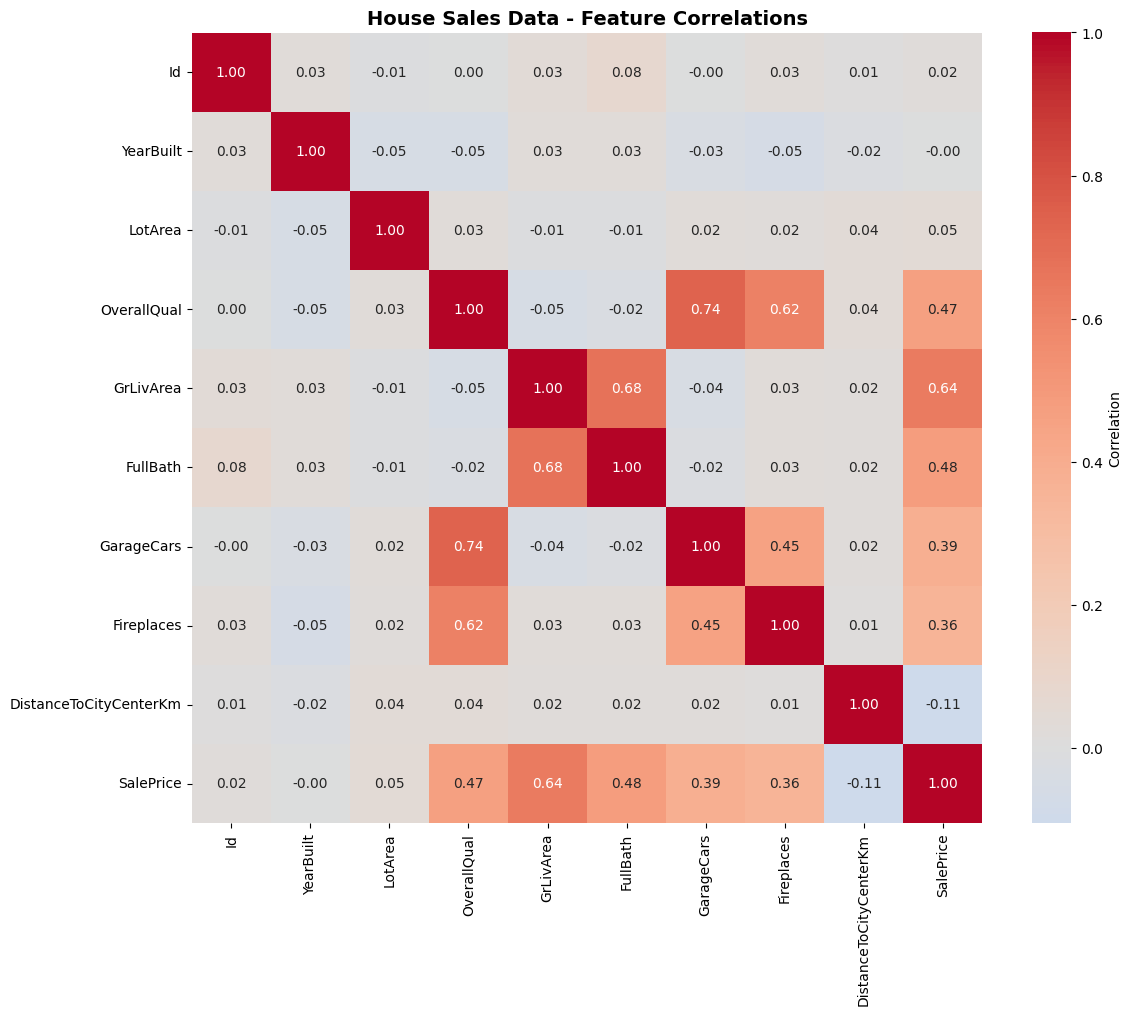

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create figure
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(numeric_df.corr(), 
            annot=True,           # Show correlation values
            fmt='.2f',            # Format to 2 decimals
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            cbar_kws={'label': 'Correlation'})

plt.title('House Sales Data - Feature Correlations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------

Cell 6 — First Look at Data (Code)

In [6]:
df.head(100)

,Id,Neighborhood,YearBuilt,LotArea,OverallQual,GrLivArea,FullBath,GarageCars,Fireplaces,CentralAir,KitchenQual,DistanceToCityCenterKm,SaleCondition,SalePrice
0,1,Edwards,1987,5405.0,1,1981,2,0.0,0,Y,TA,2.73,Normal,230100
1,2,Mitchel,1968,7515.0,8,1138,1,2.0,2,Y,TA,6.75,Normal,267240
2,3,Crawfor,1966,5897.0,7,1073,2,1.0,0,Y,Gd,13.85,Normal,283400
3,4,Somerst,1972,25261.0,5,1730,2,0.0,1,Y,TA,5.09,Normal,347970
4,5,NAmes,1992,7649.0,5,1994,2,1.0,2,Y,TA,5.61,Normal,307380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,CollgCr,1961,8876.0,3,1186,2,0.0,1,Y,TA,6.17,Normal,207820
96,97,Mitchel,1996,3647.0,3,5747,4,1.0,0,Y,Gd,9.14,Abnorml,626940
97,98,Crawfor,2001,11761.0,7,1886,2,2.0,2,Y,TA,2.75,Normal,385220
98,99,Sawyer,2010,15078.0,7,1905,3,2.0,1,Y,TA,13.31,Normal,289910


What looks like an identifier?

What looks numeric vs categorical?

Anything suspicious?

---------------------------------------------------------------------------------------------------------------------------------------

Cell 7 — Dataset Structure (Code)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1500 non-null   int64  
 1   Neighborhood            1500 non-null   object 
 2   YearBuilt               1500 non-null   int64  
 3   LotArea                 1485 non-null   float64
 4   OverallQual             1500 non-null   int64  
 5   GrLivArea               1500 non-null   int64  
 6   FullBath                1500 non-null   int64  
 7   GarageCars              1455 non-null   float64
 8   Fireplaces              1500 non-null   int64  
 9   CentralAir              1500 non-null   object 
 10  KitchenQual             1470 non-null   object 
 11  DistanceToCityCenterKm  1478 non-null   float64
 12  SaleCondition           1500 non-null   object 
 13  SalePrice               1500 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memor

---------------------------------------------------------------------------------------------------------------------------------------

Cell 8 — Quick Statistics (Code)

In [28]:
df.describe()

,Id,YearBuilt,LotArea,OverallQual,GrLivArea,FullBath,GarageCars,Fireplaces,DistanceToCityCenterKm,SalePrice
count,1500.000000,1500.000000,1485.000000,1500.000000,1500.000000,1500.000000,1455.000000,1500.000000,1478.000000,1500.000000
mean,750.500000,1984.830667,9108.237037,5.552000,1515.328667,1.741333,1.403436,1.136667,7.969567,291028.900000
std,433.157015,20.612648,4960.506376,2.874393,615.413323,0.726712,0.961495,0.877783,3.895349,95018.749226
min,1.000000,1950.000000,2023.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.200000,72800.000000
25%,375.750000,1967.000000,5723.000000,3.000000,1149.750000,1.000000,1.000000,0.000000,5.250000,223887.500000
50%,750.500000,1984.000000,8001.000000,6.000000,1504.500000,2.000000,1.000000,1.000000,7.830000,283250.000000
75%,1125.250000,2003.000000,10975.000000,8.000000,1831.000000,2.000000,2.000000,2.000000,10.705000,344205.000000
max,1500.000000,2020.000000,44991.000000,10.000000,6325.000000,4.000000,4.000000,3.000000,19.400000,850000.000000


What columns are missing?

Why didn’t categoricals appear?

Does the mean price represent a real house?

Rule:
Never trust describe() alone.

---------------------------------------------------------------------------------------------------------------------------------------

## Columns Are Not Just Columns

For EACH column, we must ask:
- What does this represent in the real world?
- What unit is it measured in?
- Is it an input, output, or identifier?

Identifiers should almost NEVER be features.


---------------------------------------------------------------------------------------------------------------------------------------

Cell 10 — List Columns (Code)

In [29]:
df.columns

Index(['Id', 'Neighborhood', 'YearBuilt', 'LotArea', 'OverallQual',
       'GrLivArea', 'FullBath', 'GarageCars', 'Fireplaces', 'CentralAir',
       'KitchenQual', 'DistanceToCityCenterKm', 'SaleCondition', 'SalePrice'],
      dtype='object')

Exercise:

Mark each column as:

Target

Feature

Identifier

Unknown

---------------------------------------------------------------------------------------------------------------------------------------

Cell 11 — Selecting Columns (Code)

In [8]:
# Select a single column
df["SalePrice"].head()

# Select multiple columns
df2 = df[["SalePrice", "GrLivArea", "OverallQual"]]
df2.head()

,SalePrice,GrLivArea,OverallQual
0,230100,1981,1
1,267240,1138,8
2,283400,1073,7
3,347970,1730,5
4,307380,1994,5


Explicit column selection prevents accidental leakage

---------------------------------------------------------------------------------------------------------------------------------------

Cell 12 — Row Filtering (Code)

In [31]:
# Example: houses with very large living area
df[df["GrLivArea"] > 3000].head()

,Id,Neighborhood,YearBuilt,LotArea,OverallQual,GrLivArea,FullBath,GarageCars,Fireplaces,CentralAir,KitchenQual,DistanceToCityCenterKm,SaleCondition,SalePrice
6,7,Sawyer,2014,7255.0,1,6325,4,0.0,0,Y,TA,NaN,Normal,631420
96,97,Mitchel,1996,3647.0,3,5747,4,1.0,0,Y,Gd,9.14,Abnorml,626940
345,346,Somerst,1993,6841.0,3,5094,4,1.0,1,Y,TA,3.99,Normal,679680
380,381,Edwards,1977,5863.0,1,4742,4,1.0,0,Y,NaN,13.48,Normal,538160
557,558,Edwards,2002,9539.0,9,5073,4,3.0,2,Y,TA,12.10,Normal,609470


Ask:

Are these real houses or outliers?

Would these influence price heavily?

---------------------------------------------------------------------------------------------------------------------------------------

Cell 13 — Creating New Columns (Code)

In [32]:
# Example: price per square foot
df["PricePerSqFt"] = df["SalePrice"] / df["GrLivArea"]

df[["SalePrice", "GrLivArea", "PricePerSqFt"]].head()


,SalePrice,GrLivArea,PricePerSqFt
0,230100,1981,116.153458
1,267240,1138,234.833040
2,283400,1073,264.119292
3,347970,1730,201.138728
4,307380,1994,154.152457


Teach:

Features encode assumptions

This assumes linear value per area (might be wrong)

---------------------------------------------------------------------------------------------------------------------------------------

Cell 14 — Renaming Columns (Code)

In [33]:
df = df.rename(columns={
    "GrLivArea": "LivingAreaSqFt",
    "SalePrice": "HousePrice"
})

df.columns


Index(['Id', 'Neighborhood', 'YearBuilt', 'LotArea', 'OverallQual',
       'LivingAreaSqFt', 'FullBath', 'GarageCars', 'Fireplaces', 'CentralAir',
       'KitchenQual', 'DistanceToCityCenterKm', 'SaleCondition', 'HousePrice',
       'PricePerSqFt'],
      dtype='object')

Rule:

Clean names improve thinking

Code clarity affects reasoning quality

-----------------------------------------------------------------------------------------------------------------------------------------

Cell 15 — Why Raw Data Is Always Wrong (Markdown)

## Why Raw Data Is Always Wrong

Raw data problems:
- Missing values
- Incorrect types
- Outliers
- Measurement errors
- Hidden assumptions

If data were clean:
- Data scientists would not exist


-----------------------------------------------------------------------------------------------------------------------------------------

Cell 16 — Thinking Habits (Markdown)

## Thinking Habits to Enforce

Always ask:
- What is the target?
- What unit is each column?
- Which columns are inputs vs identifiers?

Never:
- Model before inspecting
- Trust summary stats blindly
- Assume missing values are random

## Exercise

1. What problem could this dataset solve?
2. What is the target?
3. Which columns should NOT be used as features?
4. What assumptions did we already make today?